# Problem Set 4b
Here you will mimic the steps provided in the `02-Get-Census-Data.ipynb` notebook to extract a set of features from an ArcGIS Onlne Dataset. 
* Work independently on this project.
* If anything is unclear, please ask for clarification
* You are encouraged to consult the online documentation for the [ArcGIS Python API](https://developers.arcgis.com/python/), in particular, the sections on [Accessing/creating content](https://developers.arcgis.com/python/guide/accessing-and-creating-content/), [Items](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.gis.toc.html#item), [Feature Layers](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#featurelayer), and [Feature Sets](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#featureset).
* When complete, rename the Juypter notebook to include your NetID, e.g. `PS4b_user123.ipynb`, and upload to Sakai.

---
1. Import the arcgis GIS object and authenticate the session using your ArcGIS Pro application. Also import Pandas (`import pandas as pd`)
1. Use the API's content helper to search for feature layer data using the keywords "`NCOneMap environment`"
    1. Show a list of the results returned (you should get 3).
1. Save the result with "owner:NCDOT.GOV" to a variable named `myItem`.
1. Display the layer(s) associated with this item
1. Save the first layer associated with this to a variable named `myLayer`
1. Print the URL associated with this layer
    1. Open this url in your browser. If you get the error "SSL required" change the beginning of the url from "`http://`" to "`https://`"
1. Create a dataframe and view the attributes *(Code provided here)*
1. Show the first few records in the table *(Code provided here)*
1. Reveal all unique values in the "RECEIVING_" column *(Code provided here)*
1. Query records where RECEIVING_ = 'South Fork Catawba River' into a variable called `myFeatureSet`
1. Save the selected features to a shapefile called `SFC_NPDES` in your `V:/` drive

In [76]:
# 1. Import packages and authenticate your GIS
import pandas as pd
from arcgis import GIS
gis = GIS('pro')


In [77]:
# 2. Search gis content ofr NCOneMap "environment" feature layers
results = gis.content.search(query='NCOneMap environment',item_type='Feature Layer',outside_org=True)



In [78]:
# 2A.Show a list of the results returned
results

[<Item title:"NC1Map NPDES" type:Feature Layer Collection owner:NCDOT.GOV>,
 <Item title:"swlg" type:Feature Layer Collection owner:amandahenley1>,
 <Item title:"State Owned_5_1_2018" type:Feature Layer Collection owner:jessica.knight>]

In [79]:
#3. Save the result with "owner:NCDOT.GOV" to a variable named myItem
myItem = results[0]

<Item title:"NC1Map NPDES" type:Feature Layer Collection owner:NCDOT.GOV>
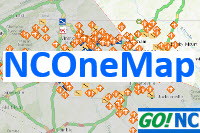

In [80]:
#4. Display the layer(s) associated with this item 
myItem

In [81]:
#5. Save the first layer item a variable named myLayer
myLayer = myItem.layers[0]

***If you have had any issues getting the feature layer to this point, run the following code cell to access it directly***<br>You can then proceed with the remainder of the exercise...

In [82]:
#Run this only if you've been unsuccessful above
from arcgis.features import FeatureLayer
lyr_url = 'https://services.nconemap.gov/secure/rest/services/NC1Map_Environment/MapServer/4'
myLayer = FeatureLayer(lyr_url)

In [83]:
#6. Print the URL associated with this layer
print(myLayer.url)

https://services.nconemap.gov/secure/rest/services/NC1Map_Environment/MapServer/4


In [84]:
#7. Create a dataframe and view the attributes This takes a moment
df = myLayer.query().df

In [85]:
#8. Show the first few records in the table
df.head(2)

,ANGLE,CLASS,COUNTY,DDLAT,DDLONG,FACILITY,LATITUDE,LONGITUDE,NPDES0306_,NPDES0306_ID,...,PERMIT,POLYGONID,RECEIVING_,REGION,SCALE,SUBBASIN,TYPE,UT_,onemap.SDEADMIN.npdes.AREA,SHAPE
0,1,Minor,Ashe,36.478333,-81.505833,United Chemi-Con Manufacturing,36284200,-81302100,0,0,...,NC0000019,0,North Fork New River,Winston-Salem,1,50702,Industrial Process & Commercial,no,0,"{'x': 385039.2810315958, 'y': 305513.906153466..."
1,1,Major,Transylvania,35.250833,-82.692778,"RFS Ecusta, Inc. ( 1 Ecusta )",35150300,-82413400,0,0,...,NC0000078,0,FRENCH BROAD RIVER,Asheville,1,40301,Industrial Process & Commercial,no,0,"{'x': 273646.56207985315, 'y': 172736.70231780..."


In [86]:
#9. Reveal all unique values in the "RECEIVING_" column
df['RECEIVING_'].unique()

array(['North Fork New River', 'FRENCH BROAD RIVER', 'Galloway Creek',
       'North Toe River', 'Tuckasegee River', 'PIGEON RIVER',
       'West Fork French Broad River', 'Little River (Cascade Lake)',
       'Lake Julian', 'DEEP RIVER (Randleman Lake)', 'CAPE FEAR RIVER',
       'ROANOKE RIVER', 'Taylor Creek', 'Far Creek',
       'East Fork Deep River', 'HAW RIVER', 'Parker Creek',
       'Barlow Branch', 'Banks Channel', 'Northeast Cape Fear River',
       'NEUSE RIVER', 'Buttermilk Creek', 'Little Cokey Swamp',
       'Beech Branch', 'TAR RIVER', 'DAN RIVER', 'Roanoke Sound',
       'Panther Creek', 'Bay River', 'Conaby Creek', 'CHOWAN RIVER',
       'Brinson Creek', 'Grove Creek', 'Lick Fork Creek', 'Taylors Creek',
       'Southwest Prong Slocum Creek', 'Pantego Creek', 'Dicks Branch',
       'Marlowe Creek', 'Raccoon Creek', 'PAMLICO RIVER',
       'Rock Fish Creek (New Kirk Pond)', 'North Flat River',
       'Livingston Creek (Broadwater Lake)',
       'South Hyco Creek (Lake 

In [87]:
#10. Query records where RECEIVING_ = 'South Fork Catawba River' into a variable called 'myFeatureSet'
myFeatureSet = myLayer.query("RECEIVING_ = 'South Fork Catawba River'")

In [66]:
# 11. Save the selected features to a shapefile called "SFC_NPDES" in your V:/ drive
outFN = myFeatureSet.save('.','SFC_NPDES')
print(outFN)

.\SFC_NPDES.shp
